# GROUP AMSTERDAM - WEEK ONE 

# Project Title: Understanding the Indian Start-up Ecosystem: Analysis and Recommendations

# Project Description: This project aims to provide insights into the Indian start-up ecosystem, including its current state, trends, and potential opportunities for growth. Through data analysis and visualization, we aim to identify key areas of focus for our team to enter the market and make a significant impact.

# Question
# 1. Which type of start-up location gets the most funding?
# 2. At which stage do start-ups get more funding from investors?
# 3. Which type of investors invest the most money?
# 4. Which type of investors invested the least money?
# 5. What is the percentage of Technology and Non-Technology in the Indian Start-up?

# Hypothesis
The method of hypothesis testing involves performing statistical tests on a sample to generate inferences or conclusions about the whole dataset.

To further analyze the data, we developed the null and alternate hypothesis to focus on two groups; Technology-biased startups and non-tech biased startups. So the two hypothesis are as follows;

NULL: Mumbai is the primary hub for startups in Indian


ALTERNATE: Mumbai is not the primary hub for starts in Indian

# DATA UNDERSTANDING - WEEK TWO 

This dataset has funding information of the Indian startups from 2018 to August 2021. It includes columns with the date funded, the city the startup is based, the names of the funders, and the amount invested

# Library importation

In [3]:
# Data handling
import numpy as np 
import pandas as pd 
import glob

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set_style('whitegrid')

# import plotly.express as px


from scipy import stats

from scipy.stats import pearsonr

from scipy.stats import chi2_contingency
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

# Other packages
import os
import re
#display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Dataset Importation

In [ ]:
# importing 2018 data separate it has different form from the other ones
startup2018=pd.read_csv('startup_funding2018.csv',
                       usecols = ['Company Name', 'Industry', 'Round/Series', 'Amount','Location'])


In [ ]:
startup2018

In [ ]:
# renaming columns for consistency
# Industry = sector 
# Round/Series = stage
startup2018.rename(columns ={'Industry':'Sector'}, inplace = True)
startup2018.rename(columns ={'Round/Series':'Stage'}, inplace = True)
startup2018.rename(columns ={'Amount':'Amount($)'}, inplace = True)
# adding new column funding year
startup2018['Funding Year']= "2018"

# Changing the founding year into integer
startup2018['Funding Year'] =startup2018['Funding Year'].astype(int)


In [ ]:
startup2018.head()

In [ ]:
startup2018['Funding Year'].dtypes

In [ ]:
startup2018.info()

Taking  a deep look at the dataset across the years, certain columns were common in all the datasets and were deemed important in the analysis. so in importing the datasets, specific columns were imported. These included Company Name, Industry, Round/Series, Amount and Location


To ensure consistency, some columns were renamed to match the columns in the dataset of subsequent years. Industry was renamed to Sector and Round/Series to Stage


A new column named Funding Year was also added to each dataset and all rows were assigned the value 2018, depending on the dataset. 


With the exception of 2018, all the other datasets had other relevant columns such as the year the startup was founded as well as the investor that provided funding. these columns were imported because there was a need to understand if the number of years that a startup had been

# DATA CLEANING 

The data cleaning phase follows the following trends

# Univariate Analysis

cleaning the Location clumns

In [ ]:
# Maintaining only the first city 
startup2018['Location']=startup2018.Location.str.split(',').str[0]
startup2018['Location'].head()

Here we have been able to remove all the cities after the comma

Sector column

In [ ]:
# Maintaining only the first sector
startup2018['Sector']=startup2018.Sector.str.split(',').str[0]
startup2018['Sector'].head()

In [ ]:
startup2018.dropna(subset=['Amount($)'], inplace=True)

In [ ]:
startup2018.head()

In [ ]:
startup2018.loc[get_index,['Amount($)']] = pd.to_numeric(startup2018.loc[get_index,['Amount($)']].squeeze(), errors='coerce') * 0.012

In [ ]:
startup2018.dropna(subset=['Amount($)'], inplace=True)


We realizing that the amount column is in object data type we needed to change to numeric datatype

In [ ]:
# getting the index all rows in the column amount that has rupees
get_index=startup2018.index[startup2018['Amount($)'].str.contains('₹')]

# charging the rows in rupees to dollars using standard rate 

startup2018.loc[get_index,['Amount($)']]=startup2018.loc[get_index,['Amount($)']].values*0.012

startup2018.loc[:,['Amount($)']].head()


In [ ]:
# startup2018.loc[get_index,['Amount']] = pd.to_numeric(startup2018.loc[get_index,['Amount']].squeeze(), errors='coerce') * 0.012

In [ ]:
# Removing the symbols and commas from the amount column ₹, $, and ,
startup2018['Amount($)'] = startup2018['Amount($)'].apply(lambda x: str(x).replace('₹', ''))
startup2018['Amount($)'] = startup2018['Amount($)'].apply(lambda x: str(x).replace('$', ''))
startup2018['Amount($)'] = startup2018['Amount($)'].apply(lambda x: str(x).replace(',', ''))

In [ ]:
startup2018.head()

Now we have agreed as a group that any amount without the synbol is considered as dollar 
hence all amount are in dollars

In [ ]:
startup2018['Amount($)']=pd.to_numeric(startup2018['Amount($)'], errors='coerce')

In [ ]:
startup2018.info()

Dropping duplicate rows

In [ ]:
startup2018= startup2018.drop_duplicates(keep='first')

In [ ]:
startup2018.head()

In [ ]:
startup2018.to_csv('cleaned_2018.csv')

Replace the undisclosed values with np.nan

Importing the 2019, 2020 and 2021 datasets

In [ ]:
startup2018=pd.read_csv('cleaned_2018.csv')
startup2019=pd.read_csv('startup_funding2019.csv')
startup2020=pd.read_csv('startup_funding2020.csv')
startup2021=pd.read_csv('startup_funding2021.csv')

In [ ]:
startup2018.head()

In [ ]:
startup2019.head()

In [ ]:
startup2019.head()

In [ ]:
# Renaming columns to suit dataset in 2018
startup2019.rename(columns ={'Founded':'Funding Year'}, inplace = True)
startup2019.rename(columns ={'HeadQuarter':'Location'}, inplace = True)
startup2019.rename(columns ={'Company/Brand':'Company Name'}, inplace = True)


In [ ]:
startup2019.head()

In [ ]:
startup2020.rename(columns ={'Founded':'Funding Year'}, inplace = True)
startup2020.rename(columns ={'HeadQuarter':'Location'}, inplace = True)
startup2020.rename(columns ={'Company/Brand':'Company Name'}, inplace = True)

In [ ]:
startup2020.head()

In [ ]:
# startup2020.drop(['Unnamed: 9'], axis=1, inplace=True)

In [ ]:
startup2020.head()

In [ ]:
startup2018.head()

In [ ]:
startup2021.rename(columns ={'Founded':'Funding Year'}, inplace = True)
startup2021.rename(columns ={'HeadQuarter':'Location'}, inplace = True)
startup2021.rename(columns ={'Company/Brand':'Company Name'}, inplace = True)

In [ ]:
startup2021.head()

In [ ]:
startup2019.to_csv('cleaned_2019.csv')
startup2020.to_csv('cleaned_2020.csv')
startup2021.to_csv('cleaned_2021.csv')

# importing 2018, 2019, 2020 and 2021 dataset together

In [5]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['cleaned_2018.csv',
 'cleaned_2019.csv',
 'cleaned_2020.csv',
 'cleaned_2021.csv']

In [6]:
#Reading the data as DataFrame
data_final=pd.DataFrame()

for file in csv_files:
    df=pd.read_csv(file)

    data_final=data_final.append(df, ignore_index=True)

In [9]:
# data_final=pd.concat([pd.read_csv(file) for file in csv_files],ignore_index=True)
# data_final

In [7]:
data_final.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company Name', 'Sector', 'Stage',
       'Amount($)', 'Location', 'Funding Year', 'What it does', 'Founders',
       'Investor', 'Unnamed: 9'],
      dtype='object')

In [8]:
data_final.drop(['Unnamed: 9'], axis=1, inplace=True)
data_final.drop(['Unnamed: 0'], axis=1, inplace=True)
data_final.drop(['What it does'], axis=1, inplace=True)
data_final.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [9]:
data_final.columns

Index(['Company Name', 'Sector', 'Stage', 'Amount($)', 'Location',
       'Funding Year', 'Founders', 'Investor'],
      dtype='object')

In [10]:
data_final.shape

(2734, 8)

In [11]:
data_final.head()

,Company Name,Sector,Stage,Amount($),Location,Funding Year,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018.0,NaN,NaN
1,PayMe India,Financial Services,Angel,2000000.0,Noida,2018.0,NaN,NaN
2,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,2018.0,NaN,NaN
3,Hasura,Cloud Infrastructure,Seed,1600000.0,Bengaluru,2018.0,NaN,NaN
4,Freightwalla,Information Services,Seed,NaN,Mumbai,2018.0,NaN,NaN


In [12]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Company Name  2734 non-null   object
 1   Sector        2716 non-null   object
 2   Stage         1796 non-null   object
 3   Amount($)     2580 non-null   object
 4   Location      2620 non-null   object
 5   Funding Year  2492 non-null   object
 6   Founders      2334 non-null   object
 7   Investor      2253 non-null   object
dtypes: object(8)
memory usage: 171.0+ KB


In [13]:
data_final['Amount($)']=pd.to_numeric(data_final['Amount($)'], errors='coerce')

In [14]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2734 non-null   object 
 1   Sector        2716 non-null   object 
 2   Stage         1796 non-null   object 
 3   Amount($)     233 non-null    float64
 4   Location      2620 non-null   object 
 5   Funding Year  2492 non-null   object 
 6   Founders      2334 non-null   object 
 7   Investor      2253 non-null   object 
dtypes: float64(1), object(7)
memory usage: 171.0+ KB


In [15]:
data_final['Amount($)'].unique()

array([2.50000e+05, 2.00000e+06,         nan, 1.60000e+06, 1.50000e+05,
       1.10000e+06, 6.00000e+06, 6.50000e+05, 1.00000e+06, 5.00000e+06,
       4.00000e+06, 2.80000e+06, 1.70000e+06, 1.30000e+06, 5.00000e+05,
       1.34000e+07, 9.00000e+06, 1.00000e+05, 2.00000e+04, 1.20000e+05,
       1.43145e+05, 7.42000e+08, 3.98000e+06, 1.00000e+04, 1.00000e+09,
       7.00000e+06, 3.50000e+07, 2.85000e+07, 2.40000e+06, 3.00000e+07,
       2.30000e+07, 1.10000e+07, 3.24000e+06, 5.40000e+08, 9.00000e+05,
       1.00000e+07, 1.50000e+06, 1.40000e+07, 1.00000e+08, 8.00000e+05,
       1.04100e+06, 1.50000e+04, 1.40000e+06, 1.20000e+06, 2.20000e+06,
       1.80000e+06, 3.60000e+06, 3.00000e+05, 6.83000e+06, 2.00000e+05,
       4.30000e+06, 3.64846e+05, 4.00000e+05, 1.32000e+07, 5.00000e+04,
       3.00000e+06, 1.25000e+06, 1.80000e+05, 4.20000e+06, 1.75000e+05,
       1.45000e+06, 4.50000e+06, 6.00000e+05, 1.50000e+07, 1.25000e+05,
       1.30000e+05, 1.72000e+07, 3.50000e+06, 1.20000e+07, 4.000

In [16]:
data_final['Funding Year'].unique()

array([2018.0, nan, 2014.0, 2004.0, 2013.0, 2010.0, 2019.0, 2017.0,
       2011.0, 2015.0, 2016.0, 2012.0, 2008.0, '2019', '2018', '2020',
       '2016', '2008', '2015', '2017', '2014', '1998', '2007', '2011',
       '1982', '2013', '2009', '2012', '1995', '2010', '2006', '1978',
       '1999', '1994', '2005', '1973', '-', '2002', '2004', '2001',
       2021.0, 2020.0, 1993.0, 1999.0, 1989.0, 2009.0, 2002.0, 1994.0,
       2006.0, 2000.0, 2007.0, 1978.0, 2003.0, 1998.0, 1991.0, 1984.0,
       2005.0, 1963.0], dtype=object)

In [17]:
data_final['Funding Year'] = data_final['Funding Year'].apply(lambda x: str(x).replace('-', ''))

In [18]:
data_final['Funding Year'] = data_final['Funding Year'].apply(lambda x: str(x).replace('nan', ''))

In [22]:
# data_final['Funding Year'] = data_final['Funding Year'].apply(lambda x: str(x).replace('', '2015'))

In [23]:
# data_final['Funding Year'].unique()

In [21]:
data_final['Funding Year']=pd.to_numeric(data_final['Funding Year'], errors='coerce')
#data_final['Funding Year']=data_final['Funding Year'].astype(int)

In [22]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2734 non-null   object 
 1   Sector        2716 non-null   object 
 2   Stage         1796 non-null   object 
 3   Amount($)     233 non-null    float64
 4   Location      2620 non-null   object 
 5   Funding Year  2491 non-null   float64
 6   Founders      2334 non-null   object 
 7   Investor      2253 non-null   object 
dtypes: float64(2), object(6)
memory usage: 171.0+ KB


# Using the Simple Imputer method to replace missing values in the funding year column

In [23]:
imp=SimpleImputer(strategy='mean')
data_final['Funding Year']=imp.fit_transform(data_final['Funding Year'].values.reshape(-1,1))
data_final['Funding Year'].isna().sum()

0

In [ ]:
# data_final['Funding Year'] = data_final['Funding Year'].apply(lambda x: str(x).replace('', '2016'))

In [ ]:
# data_final.info()

In [24]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),233.0,2.317790e+07,9.563237e+07,7500.0,550000.0,1600000.0,5000000.0,1.000000e+09
Funding Year,2734.0,2.016373e+03,3.893420e+00,1963.0,2015.0,2017.0,2018.0,2.021000e+03


In [29]:
data_final['Funding Year'].unique()

array([2018.        , 2016.37334404, 2014.        , 2004.        ,
       2013.        , 2010.        , 2019.        , 2017.        ,
       2011.        , 2015.        , 2016.        , 2012.        ,
       2008.        , 2020.        , 1998.        , 2007.        ,
       1982.        , 2009.        , 1995.        , 2006.        ,
       1978.        , 1999.        , 1994.        , 2005.        ,
       1973.        , 2002.        , 2001.        , 2021.        ,
       1993.        , 1989.        , 2000.        , 2003.        ,
       1991.        , 1984.        , 1963.        ])

In [25]:
missing_percentage=data_final.isna().mean()*100

In [26]:
missing_percentage

Company Name     0.000000
Sector           0.658376
Stage           34.308705
Amount($)       91.477688
Location         4.169715
Funding Year     0.000000
Founders        14.630578
Investor        17.593270
dtype: float64

# Using the Simple Imputer method to replace missing values in the amount column

In [27]:
imp=SimpleImputer(strategy='median')
data_final['Amount($)']=imp.fit_transform(data_final['Amount($)'].values.reshape(-1,1))
data_final['Amount($)'].isna().sum()

0

In [28]:
missing_percentage=data_final.isna().mean()*100

In [29]:
missing_percentage

Company Name     0.000000
Sector           0.658376
Stage           34.308705
Amount($)        0.000000
Location         4.169715
Funding Year     0.000000
Founders        14.630578
Investor        17.593270
dtype: float64

In [30]:
data_final['Stage'].unique()

array(['Seed', 'Angel', 'Series A', 'Pre-Seed', 'Private Equity',
       'Series B', 'Grant', 'Series H', 'Series C',
       'Venture - Series Unknown', 'Debt Financing', 'Post-IPO Debt',
       'Series E', 'Corporate Round',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre s

# We remove the website url from the stage since it is not a stage name

In [31]:
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'Seed Funding'))

In [32]:
data_final['Stage'].unique()

array(['Seed', 'Angel', 'Series A', 'Pre-Seed', 'Private Equity',
       'Series B', 'Grant', 'Series H', 'Series C',
       'Venture - Series Unknown', 'Debt Financing', 'Post-IPO Debt',
       'Series E', 'Corporate Round', 'Seed Funding', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round', 'nan', 'Fresh funding', 'Pre series A',
       'Series G', 'Post series A', 'Seed funding', 'Seed fund',
       'Series F', 'Series B+', 'Seed round', 'Pre-series A', 'Pre-seed',
       'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B', 'Bridge',
       'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', '$1200000', 'Seed+

# Removing and replacing the mismatch values for instance moneys appears in stage

In [33]:
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('$6000000', 'Seed Funding'))
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('$1000000', 'Seed Funding'))
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('$300000', 'Pre seed Round'))
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('$1200000', 'Series B3'))
data_final['Stage'] = data_final['Stage'].apply(lambda x: str(x).replace('nan', 'Bridge Round'))

In [34]:
missing_percentage=data_final.isna().mean()*100

In [35]:
missing_percentage

Company Name     0.000000
Sector           0.658376
Stage            0.000000
Amount($)        0.000000
Location         4.169715
Funding Year     0.000000
Founders        14.630578
Investor        17.593270
dtype: float64

In [36]:
data_final['Investor'].unique()

array([nan, 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [37]:
data_final['Investor'] = data_final['Investor'].apply(lambda x: str(x).replace('nan', 'Undisclosed'))

In [38]:
missing_percentage=data_final.isna().mean()*100
missing_percentage

Company Name     0.000000
Sector           0.658376
Stage            0.000000
Amount($)        0.000000
Location         4.169715
Funding Year     0.000000
Founders        14.630578
Investor         0.000000
dtype: float64

In [39]:
data_final['Founders'].unique()

array([nan, 'Shantanu Deshpande', 'Adamas Belva Syah Devara, Iman Usman.',
       ..., 'Bala Sarda', 'Arnav Kumar, Vaibhav Singh',
       'Vishal Chopra, Himanshu Gupta'], dtype=object)

In [40]:
data_final['Founders'] = data_final['Founders'].apply(lambda x: str(x).replace('nan', 'Arnav Kumar'))

In [41]:
missing_percentage=data_final.isna().mean()*100
missing_percentage

Company Name    0.000000
Sector          0.658376
Stage           0.000000
Amount($)       0.000000
Location        4.169715
Funding Year    0.000000
Founders        0.000000
Investor        0.000000
dtype: float64

In [42]:
data_final['Location'].unique()

array(['Bangalore', 'Noida', 'Hyderabad', 'Bengaluru', 'Mumbai', 'Delhi',
       'India', 'Hubli', 'New Delhi', 'Mohali', 'Chennai', 'Kolkata',
       'Pune', 'Gurgaon', 'Azadpur', 'Haryana', 'Cochin', 'Anand',
       'Jaipur', 'Thane', 'Indore', 'Alwar', 'Ahmedabad', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Bangalore City', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow', nan, 'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh',
       'Rajasthan', 'Belgaum', 'Tirunelveli, Tamilnadu', 'Singapore',
       'Gujarat', 'Kerala', 'Jodhpur', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',

In [43]:
#data_final['Location'] = data_final['Location'].apply(lambda x: str(x).replace('nan', 'San Francisco, California'))

In [44]:
missing_percentage=data_final.isna().mean()*100
missing_percentage

Company Name    0.000000
Sector          0.658376
Stage           0.000000
Amount($)       0.000000
Location        4.169715
Funding Year    0.000000
Founders        0.000000
Investor        0.000000
dtype: float64

In [45]:
data_final.head()

,Company Name,Sector,Stage,Amount($),Location,Funding Year,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018.0,Arnav Kumar,Undisclosed
1,PayMe India,Financial Services,Angel,2000000.0,Noida,2018.0,Arnav Kumar,Undisclosed
2,Eunimart,E-Commerce Platforms,Seed,1600000.0,Hyderabad,2018.0,Arnav Kumar,Undisclosed
3,Hasura,Cloud Infrastructure,Seed,1600000.0,Bengaluru,2018.0,Arnav Kumar,Undisclosed
4,Freightwalla,Information Services,Seed,1600000.0,Mumbai,2018.0,Arnav Kumar,Undisclosed


In [51]:
data_final.shape

(2734, 8)

# WEEK 3 - DATA PREPARATION 

## At the data preparation stage, we inspect the datasets in full, present it, test our hypotheses and rethink the cleaning, and creating new  features that will help us answer our question asked in the begining. 

In [46]:
data_final.head(10)

,Company Name,Sector,Stage,Amount($),Location,Funding Year,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018.0,Arnav Kumar,Undisclosed
1,PayMe India,Financial Services,Angel,2000000.0,Noida,2018.0,Arnav Kumar,Undisclosed
2,Eunimart,E-Commerce Platforms,Seed,1600000.0,Hyderabad,2018.0,Arnav Kumar,Undisclosed
3,Hasura,Cloud Infrastructure,Seed,1600000.0,Bengaluru,2018.0,Arnav Kumar,Undisclosed
4,Freightwalla,Information Services,Seed,1600000.0,Mumbai,2018.0,Arnav Kumar,Undisclosed
5,Microchip Payments,Mobile Payments,Seed,1600000.0,Bangalore,2018.0,Arnav Kumar,Undisclosed
6,BizCrum Infotech Pvt. Ltd.,B2B,Seed,1600000.0,Delhi,2018.0,Arnav Kumar,Undisclosed
7,Emojifi,Internet,Seed,1600000.0,Bengaluru,2018.0,Arnav Kumar,Undisclosed
8,Flock,Apps,Seed,1600000.0,India,2018.0,Arnav Kumar,Undisclosed
9,Freshboxx,Food Delivery,Seed,1600000.0,Hubli,2018.0,Arnav Kumar,Undisclosed


# Dataset overview
# We inspected our final dataset using the following methods: .head(), .info(), .tail(), .shape()

In [47]:
data_final.head()

,Company Name,Sector,Stage,Amount($),Location,Funding Year,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bangalore,2018.0,Arnav Kumar,Undisclosed
1,PayMe India,Financial Services,Angel,2000000.0,Noida,2018.0,Arnav Kumar,Undisclosed
2,Eunimart,E-Commerce Platforms,Seed,1600000.0,Hyderabad,2018.0,Arnav Kumar,Undisclosed
3,Hasura,Cloud Infrastructure,Seed,1600000.0,Bengaluru,2018.0,Arnav Kumar,Undisclosed
4,Freightwalla,Information Services,Seed,1600000.0,Mumbai,2018.0,Arnav Kumar,Undisclosed


In [48]:
data_final.tail()

,Company Name,Sector,Stage,Amount($),Location,Funding Year,Founders,Investor
2729,Gigforce,Staffing & Recruiting,Pre-series A,1600000.0,Gurugram,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners
2730,Vahdam,Food & Beverages,Series D,1600000.0,New Delhi,2015.0,Bala Sarda,IIFL AMC
2731,Leap Finance,Financial Services,Series C,1600000.0,Bangalore,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2732,CollegeDekho,EdTech,Series B,1600000.0,Gurugram,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital"
2733,WeRize,Financial Services,Series A,1600000.0,Bangalore,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital"


In [49]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2734 non-null   object 
 1   Sector        2716 non-null   object 
 2   Stage         2734 non-null   object 
 3   Amount($)     2734 non-null   float64
 4   Location      2620 non-null   object 
 5   Funding Year  2734 non-null   float64
 6   Founders      2734 non-null   object 
 7   Investor      2734 non-null   object 
dtypes: float64(2), object(6)
memory usage: 171.0+ KB


In [50]:
data_final.shape

(2734, 8)

In [51]:
data_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),2734.0,3.438936e+06,2.850725e+07,7500.0,1600000.0,1600000.0,1600000.0,1.000000e+09
Funding Year,2734.0,2.016373e+03,3.893420e+00,1963.0,2015.0,2017.0,2018.0,2.021000e+03


In [52]:
index_ = data_final.index[data_final['Investor']=='Undisclosed']
index_

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2503, 2514, 2517, 2524, 2525, 2605, 2613, 2698, 2699, 2702],
           dtype='int64', length=494)

In [53]:
data_final['Investor'] = data_final['Investor'].replace('Undisclosed', np.nan)

In [54]:
#Strip the location data to only the city-area. 
data_final['Location'] = data_final.Location.str.split(',').str[0]
data_final['Location'].head()

0    Bangalore
1        Noida
2    Hyderabad
3    Bengaluru
4       Mumbai
Name: Location, dtype: object

<AxesSubplot:>

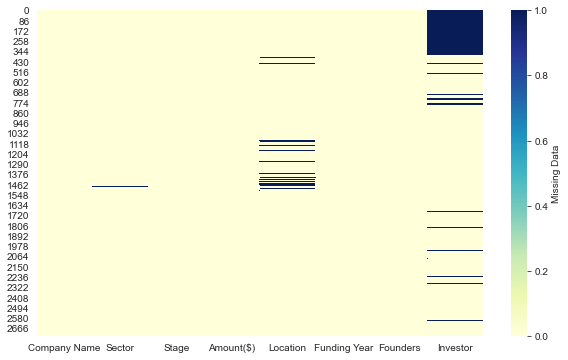

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(data_final.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [62]:
data_final.isnull().sum()

Company Name      0
Sector           18
Stage             0
Amount($)         0
Location        114
Funding Year      0
Founders          0
Investor        494
dtype: int64

In [56]:
# Find the mode of the 'Investor' column
mode = data_final['Founders'].mode()[0]

In [57]:
mode

'Arnav Kumar'

In [58]:
# Replace missing values in the 'Founders' column with the mode
data_final['Founders'].fillna(mode, inplace=True)

In [59]:
# Find the mode of the 'Location' column
mode = data_final['Location'].mode()[0]

In [60]:
mode

'Bangalore'

In [61]:
# Replace missing values in the 'Location' column with the mode
data_final['Location'].fillna(mode, inplace=True)

In [62]:
data_final.isnull().sum()

Company Name      0
Sector           18
Stage             0
Amount($)         0
Location          0
Funding Year      0
Founders          0
Investor        494
dtype: int64

In [63]:
# drop the NaN values
data_final = data_final.dropna()

<AxesSubplot:>

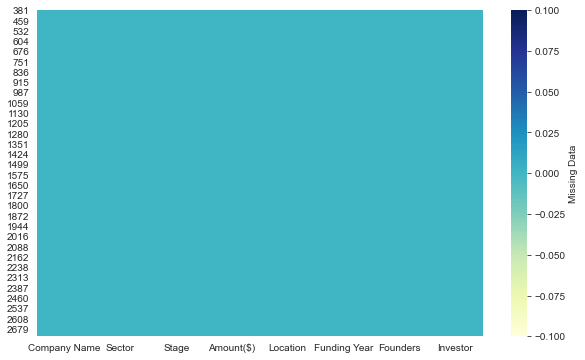

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(data_final.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [65]:
data_final.isnull().sum()

Company Name    0
Sector          0
Stage           0
Amount($)       0
Location        0
Funding Year    0
Founders        0
Investor        0
dtype: int64

In [123]:
# data_final.to_csv('data_startup.csv')

Column by column analysis 

In this session, we discuss each column into detail to ascertain some level of information that assist us answer our question asked in week 1. This may include the use of .describe() method, matplotlib and other statistical tools

we will first consider the Company Name

In [66]:
data_final['Company Name'].head()

381    Bombay Shaving
382         Ruangguru
383          Eduisfun
384          HomeLane
385          Nu Genes
Name: Company Name, dtype: object

Sector

In [67]:
data_final['Sector'].head()

381          Ecommerce
382             Edtech
383             Edtech
384    Interior design
385           AgriTech
Name: Sector, dtype: object

Stage

In [68]:
data_final['Stage'].head()

381     Bridge Round
382         Series C
383    Fresh funding
384         Series D
385     Bridge Round
Name: Stage, dtype: object

Amount($)

In [69]:
data_final['Amount($)'].head()

381    1600000.0
382    1600000.0
383    1600000.0
384    1600000.0
385    1600000.0
Name: Amount($), dtype: float64

In [70]:
# calculate basic statistical measures
data_final_mean = data_final['Amount($)'].mean()
data_final_median = data_final['Amount($)'].median()
data_final_mode = data_final['Amount($)'].mode()
data_final_std_dev = data_final['Amount($)'].std()
data_final_min_val = data_final['Amount($)'].min()
data_final_max_val = data_final['Amount($)'].max()

In [71]:
print("Mean: ", data_final_mean)
print("Median: ", data_final_median)
print("Mode: ", data_final_mode)
print("Standard Deviation: ", data_final_std_dev)
print("Minimum Value: ", data_final_min_val)
print("Maximum Value: ", data_final_max_val)

Mean:  1600000.0
Median:  1600000.0
Mode:  0    1600000.0
Name: Amount($), dtype: float64
Standard Deviation:  0.0
Minimum Value:  1600000.0
Maximum Value:  1600000.0


In [72]:
# create a histogram
# plt.hist(data_final['Amount($)'])
# plt.xlabel('Amount($)')
# plt.ylabel('Frequency')
# plt.title('Histogram of Amount($)')
# plt.show()

Analysis on the Sector

In [80]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
# Sector_counts = data_final.groupby('Sector')['Amount($)'].count().reset_index()

In [ ]:
# Sort the counts in descending order and select the top 5 values
# Sector_counts = Sector_counts.sort_values(by='Amount($)', ascending=False).head(5)

In [ ]:
# Create the donut chart
# fig = px.pie(Sector_counts, values='Amount($)', names='Sector', hole=.4)

# fig.show()

In [73]:
# Group the DataFrame by the 'Stage' column and count the occurrences of each stage
Investor_counts = data_final.groupby('Investor')['Amount($)'].count().reset_index()

# Sort the counts in descending order and select the top 5 values
Investor_counts = Investor_counts.sort_values(by='Amount($)', ascending=False).tail(10)

Investor_counts

,Investor,Amount($)
628,I2I Capitals,1
627,Hyperplane Venture Capital,1
626,"Hungama, Hindustan Talkies",1
625,"Hummingbird Ventures, Bedrock Capital",1
624,Huddle Accelerator,1
623,HostelFund,1
622,"Hornbill Capital Advisers, Plutus Wealth Manag...",1
621,Homage Ventures.,1
620,"Hitesh Oberoi, Lightbox",1
1764,velocity.in,1


In [74]:
corr_matrix=data_final.corr()

corr_matrix

,Amount($),Funding Year
Amount($),NaN,NaN
Funding Year,NaN,1.0


<AxesSubplot:xlabel='Amount($)', ylabel='Funding Year'>

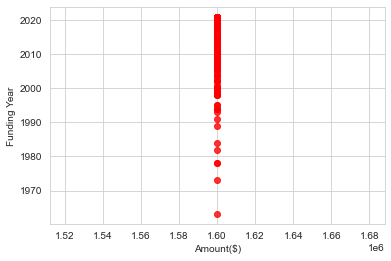

In [75]:
sns.regplot(x='Amount($)', y='Funding Year', data=data_final, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

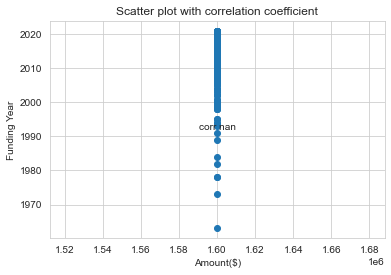

In [76]:
x = data_final['Amount($)']
y = data_final['Funding Year']

corr, _ = pearsonr(x, y)
plt.scatter(x, y)
plt.xlabel('Amount($)')
plt.ylabel('Funding Year')
plt.title('Scatter plot with correlation coefficient')
plt.annotate(f'corr {corr:.2f}', (0.5, 0.5), xycoords='axes fraction', ha='center')
plt.show()

# QUESTIONS TO BE ANSWERED

# QUESTION 1: Which type of start-up location gets the most funding?

In [77]:
index_new = data_final.index[data_final['Location']=='California']
#index_new
Location_data = data_final.drop(labels=index_new, axis=0)

In [78]:
index_new

Int64Index([646, 787, 856, 858, 869], dtype='int64')

In [79]:
Location_grp = Location_data.groupby('Location')['Amount($)'].sum().reset_index()
top_10_locations = Location_grp.sort_values(by = 'Amount($)', ascending = False).head(10)
#top_5_locations = Location_grp.sort_values(by = 'Amount($)', ascending = False).head(5)
top_10_locations

,Location,Amount($)
5,Bangalore,1.336000e+09
56,Mumbai,5.680000e+08
32,Gurugram,3.584000e+08
58,New Delhi,2.800000e+08
17,Chennai,1.344000e+08
71,Pune,1.264000e+08
61,Noida,1.104000e+08
22,Delhi,1.056000e+08
36,Hyderabad,8.960000e+07
31,Gurgaon,4.000000e+07


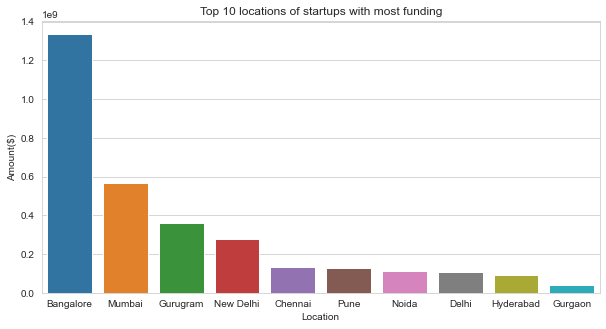

In [80]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart to represent the answer

sns.barplot(x='Location', y='Amount($)', data=top_10_locations)

# Adding labels and title
plt.xlabel("Location")
plt.ylabel("Amount($)")
plt.title("Top 10 locations of startups with most funding")


#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.show()

From the visual above we can say that Bangalore recieved the most funding followed by Mumbai which had less than half of Bangalore's value. It can also be said that the bottom three startups that recieved the least amount are Delhi, Hyderbad and Gurgaon respectively

# QUESTION 2: At which stage do start-ups get more funding from investors?

In [81]:
stage_data = data_final.groupby('Stage')['Amount($)'].sum().reset_index()
top_10_stages = stage_data.sort_values(by = 'Amount($)', ascending = False).head(10)
top_10_stages

,Stage,Amount($)
2,Bridge Round,1.400000e+09
27,Seed,4.848000e+08
38,Series A,3.552000e+08
23,Pre-series A,3.184000e+08
42,Series B,1.808000e+08
46,Series C,1.568000e+08
31,Seed Round,1.024000e+08
13,Pre series A,9.280000e+07
20,Pre-seed,9.120000e+07
48,Series D,7.360000e+07


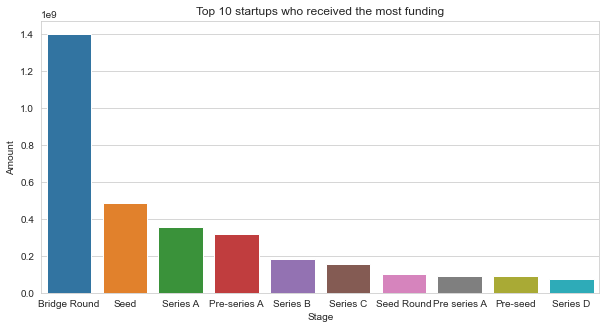

In [82]:
#displaying the results of the top 10 stages 

fig = plt.figure(figsize = (10, 5))

# Create a bar chart to represent our answer
sns.barplot(x='Stage', y='Amount($)', data=top_10_stages)

# Adding labels and title
plt.xlabel("Stage")
plt.ylabel("Amount")
plt.title("Top 10 startups who received the most funding")


#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.show()

Bridge Round stage recieved the most funding, Series D had the least funding. It can be concluded that Bridge Round recieved more than twice the funds recieved by Seed stage and any other stages.

# Question 3: Which type of investors invest the most money?

In [83]:
Investor_data = data_final.groupby('Investor')['Amount($)'].sum().reset_index()
Investor_data = Investor_data.sort_values(by = 'Amount($)', ascending = False)

#listing the top 10 stages

Investor_10_data = Investor_data.head(10)
Investor_10_data

,Investor,Amount($)
693,Inflection Point Ventures,57600000.0
1617,Venture Catalysts,51200000.0
987,Mumbai Angels Network,27200000.0
162,Angel investors,24000000.0
1519,Tiger Global,19200000.0
1542,Titan Capital,17600000.0
1586,Unicorn India Ventures,16000000.0
139,Alteria Capital,14400000.0
1311,Sequoia Capital India,14400000.0
280,Better Capital,14400000.0


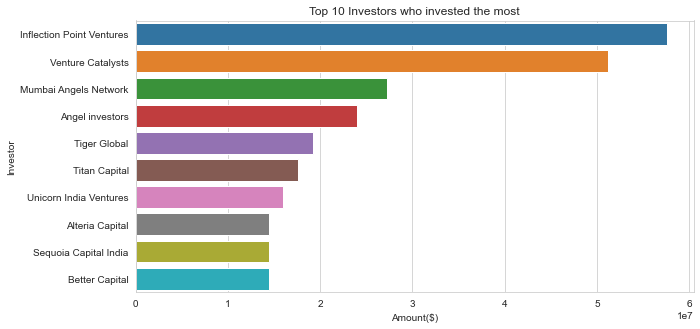

In [84]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Amount($)', y='Investor', data=Investor_10_data)

# Adding labels and title
plt.xlabel("Amount($)")
plt.ylabel("Investor")
plt.title("Top 10 Investors who invested the most")


# set y ticks and labels
plt.xticks(rotation = 0)

# Show the plot
plt.show()

The bar chat above represents the share of how much each investor had invested. Inflection Point Venures topped the list, followed by Venture. Alteria Capital, Sequoia Capital India and Better Capital invested same amount.

# Question 4: Which type of investors invested the least money?

In [85]:
Investor_data = data_final.groupby('Investor')['Amount($)'].sum().reset_index()
Investor_data = Investor_data.sort_values(by = 'Amount($)', ascending = False)

#listing the least 5 investors who invested the least money

Investor_5_data = Investor_data.tail(5)
Investor_5_data

,Investor,Amount($)
623,HostelFund,1600000.0
622,"Hornbill Capital Advisers, Plutus Wealth Manag...",1600000.0
621,Homage Ventures.,1600000.0
620,"Hitesh Oberoi, Lightbox",1600000.0
1764,velocity.in,1600000.0


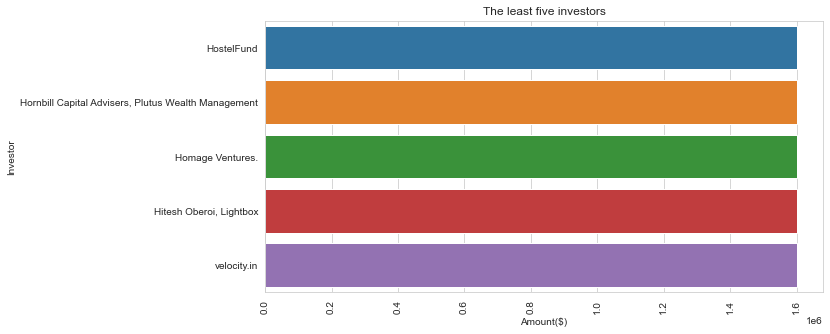

In [86]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Amount($)', y='Investor', data=Investor_5_data)

# Adding labels and title
plt.xlabel("Amount($)")
plt.ylabel("Investor")
plt.title("The least five investors")


# set y ticks and labels
plt.xticks(rotation = 90)

# Show the plot
plt.show()

# QUESTION 5: What is the percentage of Technology and Non-Technology in the Indian startups?

To answer this question we need to define and classify startups that belong to the group of technology and non technology

In [118]:
# Define the keywords
keywords = ["fintech", "edtech", "e-commerce","robotics", "cryptocurrency", "esports",
            "automotive ", "engineering ","telecommunications", "electricity", 
            "agritech", "healthtech", "technology", "e-marketplace", "social", 
            "tech", "gaming", "computer", "femtech", "solar", "embedded ", 
            "software ", "saas ", "e-commerce", "analytics", "ar", "vr", "crm", "nft", 
            "e-learning", "iot", "e-commerce", "e-mobility", "api ", 
            "ecommerce", "media", "ai","sportstech", "traveltech", "online", 
            "information", "automobile", "e-commerce", "biotechnology", "applications",  
            "it", "edtech", "energy", "computer", "agritech", "online ", "virtual ", 
            "fintech", "internet", "automation", "cloud", "apps", "chatbot", 
            "digital", "cleantech", "ev", "manufacturing","networking", "mobile ", 
            "electronics", "logitech", "solar", "insurtech","finance", "electric", 
            "fmcg", "intelligence", "blockchain","crypto", "foodtech ", "audio ", 
            "nanotechnology", "biometrics", "auto-tech", "biotech", "data ",  "autonomous ", 
            "AI", "machine learning", "e-market", "proptech", "machine learning "]

In [119]:
# the function here groups the keyword in the previous cell into technology and any other to non technology
    def check_keywords(string, keywords):
        for keyword in keywords:
            if keyword in string:
                return "technology"
        return "non-technology"

In [120]:
# Select only the rows with non-null values in the Sector column
data_final = data_final[data_final["Sector"].notnull()]

# Convert the Sector column to a Pandas Series
sector_series = pd.Series(data_final["Sector"])

#startup_funding_Full["Sector"].str.apply(check_keywords, keywords=keywords)

# Apply the check_keywords function to the Series
sector_series = sector_series.apply(check_keywords, keywords=keywords)

# Convert the resulting Series back to a column in the startup_funding_Full DataFrame
data_final["label"] = sector_series

This code prints the share of each label that is technology and non technology 

In [121]:
#Count the occurance of each unique term in the label column 

data_final["label"].value_counts(normalize=True)*100

non-technology    58.415842
technology        41.584158
Name: label, dtype: float64

From the output we can say that, Technology has the majority share compare to non technology

([<matplotlib.patches.Wedge at 0x20adb9baf40>,
 [Text(-0.2874541312823803, 1.0617768703492707, 'Technology '),
  Text(0.2874541312823807, -1.0617768703492707, 'Non-technology ')],
 [Text(-0.15679316251766195, 0.5791510201905112, '58.4%'),
  Text(0.15679316251766215, -0.5791510201905112, '41.6%')])

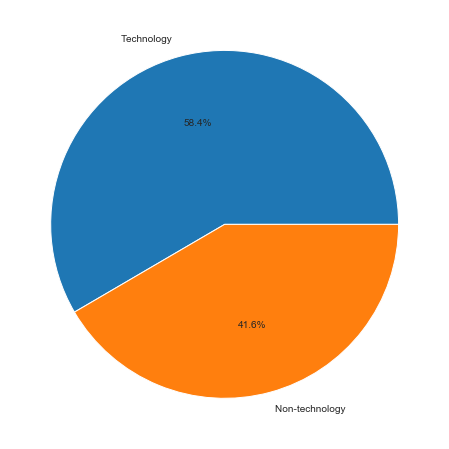

In [122]:
#A pie chart to show the distribution of the two labels 

plt.subplots(figsize = (10,8))
label = ['Technology ', 'Non-technology ']
label_data = data_final["label"].value_counts()

plt.pie(label_data, labels=label, autopct='%1.1f%%')

The pie chart represent the share these two groups. Technology has about 77% and Non-technology has about 22% as seen in the above pie chart

# Hypothesis Testing

NULL: Mumbai is the primary hub of Idian startups
Alternative: Mumbai is not the primary hub of Idian startups


To test this hypothesis, we created a grouby with location and company name. We grouped all location and number of startups in that location.

In [124]:
df_startups_per_city = data_final[['Location', 'Company Name']]
df_grouped_startups_per_city= df_startups_per_city.groupby('Location').count().reset_index()
df_grouped_startups_per_city

#.groupby('Investor')['Amount($)'].sum()

#Investor_data = data_final.groupby('Investor')['Amount($)'].sum().reset_index()
#Investor_data = Investor_data.sort_values(by = 'Amount($)', ascending = False)

,Location,Company Name
0,Ahmadabad,5
1,Ahmedabad,22
2,Ambernath,1
3,Andheri,3
4,Bangaldesh,1
5,Bangalore,835
6,Bangkok,1
7,Banglore,1
8,Beijing,1
9,Belgaum,1


In [97]:
df_grouped_startups_per_city.rename(columns={'Company Name':'Startup_counts'}, inplace = True)
df_grouped_startups_per_city

,Location,Startup_counts
0,Ahmadabad,5
1,Ahmedabad,22
2,Ambernath,1
3,Andheri,3
4,Bangaldesh,1


In [100]:
startup_top_10=df_grouped_startups_per_city.sort_values(by='Startup_counts',ascending=False)[:10]
startup_top_10.head(10)

#Investor_data = Investor_data.sort_values(by = 'Amount($)', ascending = False)

,Location,Startup_counts
5,Bangalore,835
57,Mumbai,355
33,Gurugram,224
59,New Delhi,175
18,Chennai,84
72,Pune,79
62,Noida,69
23,Delhi,66
37,Hyderabad,56
32,Gurgaon,25


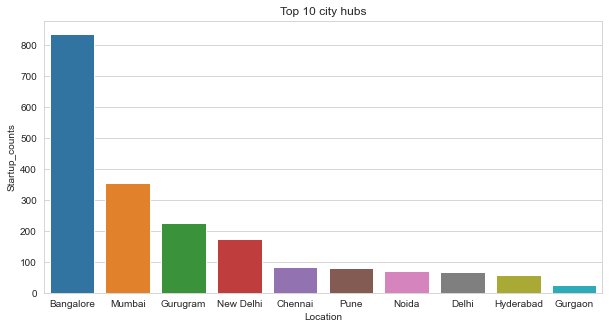

In [101]:
fig = plt.figure(figsize = (10, 5))

# Create a bar chart using seaborn
sns.barplot(x='Location', y='Startup_counts', data=startup_top_10)

# Adding labels and title
plt.xlabel("Location")
plt.ylabel("Startup_counts")
plt.title("Top 10 city hubs")


# set y ticks and labels
plt.xticks(rotation = 0)

# Show the plot
plt.show()

In [104]:
df_pie=startup_top_10.head()

In [105]:
df_pie

,Location,Startup_counts
5,Bangalore,835
57,Mumbai,355
33,Gurugram,224
59,New Delhi,175
18,Chennai,84


In [107]:
df_pie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 5 to 18
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Location        5 non-null      object
 1   Startup_counts  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


In [116]:
df_pie=df_pie[:2]

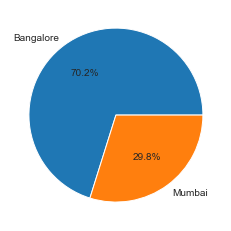

In [117]:
plt.pie(df_pie['Startup_counts'], labels=df_pie['Location'], autopct='%1.1f%%')


plt.show()
#plt.pie(label_data, labels=label, autopct='%1.1f%%')

From the above charts, clearly it can been seen that Mumbai has fewer startup as compre to Bangalore. 
Infact Bangalore had twice more startups than what Mumbai had.
We therefore rejected the NULL hyposthesis. This is beacause there is enough evidence to do so.

Bangalore is the primary hub for startups in Indian.